#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from crucio import SMOTE, SMOTEENN, ICOTE, TKRKNN

import warnings

# Suppress Matplotlib warnings
warnings.filterwarnings('ignore', category=UserWarning)

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('Pokemon.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [3]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
#,800.000,362.814,208.344,1.000,184.750,364.500,539.250,721.000
Total,800.000,435.103,119.963,180.000,330.000,450.000,515.000,780.000
HP,800.000,69.259,25.535,1.000,50.000,65.000,80.000,255.000
Attack,800.000,79.001,32.457,5.000,55.000,75.000,100.000,190.000
Defense,800.000,73.843,31.184,5.000,50.000,70.000,90.000,230.000
Sp. Atk,800.000,72.820,32.722,10.000,49.750,65.000,95.000,194.000
Sp. Def,800.000,71.903,27.829,20.000,50.000,70.000,90.000,230.000
Speed,800.000,68.278,29.060,5.000,45.000,65.000,90.000,180.000
Generation,800.000,3.324,1.661,1.000,2.000,3.000,5.000,6.000


In [4]:
dataFrame = dataFrame.drop('Name', axis=1)
dataFrame = dataFrame.drop('#', axis=1)
dataFrame

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
# Get unique values and their counts for 'Type 1'
type1_counts = dataFrame['Type 1'].value_counts()

# Get unique values and their counts for 'Type 2'
type2_counts = dataFrame['Type 2'].value_counts()

# Get unique values and their counts for 'Legendary'
legendary_counts = dataFrame['Legendary'].value_counts()

# Calculate total number of rows
total_rows = len(dataFrame)

# Calculate percentage for 'Type 1'
type1_percentages = (type1_counts / total_rows) * 100

# Calculate percentage for 'Type 2'
type2_percentages = (type2_counts / total_rows) * 100

# Calculate percentage for 'Legendary'
legendary_percentages = (legendary_counts / total_rows) * 100

# Print unique values and percentages for 'Type 1'
print("Unique values and percentages for 'Type 1':")
print(type1_percentages)

# Print unique values and percentages for 'Type 2'
print("\nUnique values and percentages for 'Type 2':")
print(type2_percentages)

# Print unique values and percentages for 'Legendary'
print("\nUnique values and percentages for 'Legendary':")
print(legendary_counts)

Unique values and percentages for 'Type 1':
Type 1
Water       14.000
Normal      12.250
Grass        8.750
Bug          8.625
Psychic      7.125
Fire         6.500
Electric     5.500
Rock         5.500
Dragon       4.000
Ground       4.000
Ghost        4.000
Dark         3.875
Poison       3.500
Steel        3.375
Fighting     3.375
Ice          3.000
Fairy        2.125
Flying       0.500
Name: count, dtype: float64

Unique values and percentages for 'Type 2':
Type 2
Flying      12.125
Ground       4.375
Poison       4.250
Psychic      4.125
Fighting     3.250
Grass        3.125
Fairy        2.875
Steel        2.750
Dark         2.500
Dragon       2.250
Water        1.750
Ghost        1.750
Ice          1.750
Rock         1.750
Fire         1.500
Electric     0.750
Normal       0.500
Bug          0.375
Name: count, dtype: float64

Unique values and percentages for 'Legendary':
Legendary
False    735
True      65
Name: count, dtype: int64


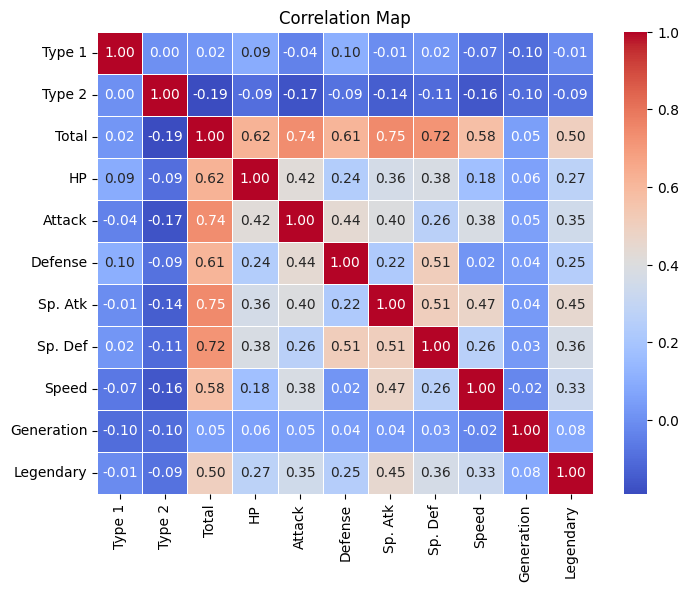

In [6]:
non_numeric_columns = ['Type 1', 'Type 2', 'Legendary']

# Convert non numeric columns
label_encoder = LabelEncoder()
dataFrameCopy = dataFrame.copy()
dataFrameCopy[non_numeric_columns] = dataFrameCopy[non_numeric_columns].apply(lambda col: label_encoder.fit_transform(col))

# Calculate the correlation matrix
correlation_matrix = dataFrameCopy.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

#### Undersampling

In [7]:
# Assuming your data is in a DataFrame called 'df'
# Count the number of True and False values in the 'Legendary' column
true_count = dataFrame['Legendary'].value_counts()[True]
false_count = dataFrame['Legendary'].value_counts()[False]

# Separate the majority and minority classes
majority_class = dataFrame[dataFrame['Legendary'] == False]
minority_class = dataFrame[dataFrame['Legendary'] == True]

# Undersample the majority class
majority_class_undersampled = resample(majority_class,
                                       replace=False,
                                       n_samples=true_count,
                                       random_state=42)

# Combine the minority class and the undersampled majority class
undersampled_data = pd.concat([majority_class_undersampled, minority_class])

# Check the new class counts
print('Undersampled data counts:')
print(undersampled_data['Legendary'].value_counts())

Undersampled data counts:
Legendary
False    65
True     65
Name: count, dtype: int64


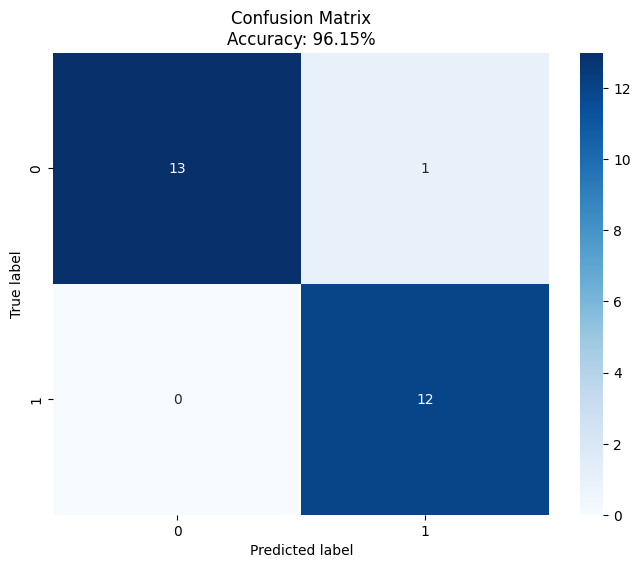

In [8]:
# Separate features and target variable
X = undersampled_data.drop('Legendary', axis=1)  # Features
y = undersampled_data['Legendary']  # Target variable

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
undersampled_accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\nAccuracy: {:.2f}%'.format(undersampled_accuracy * 100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Class weights

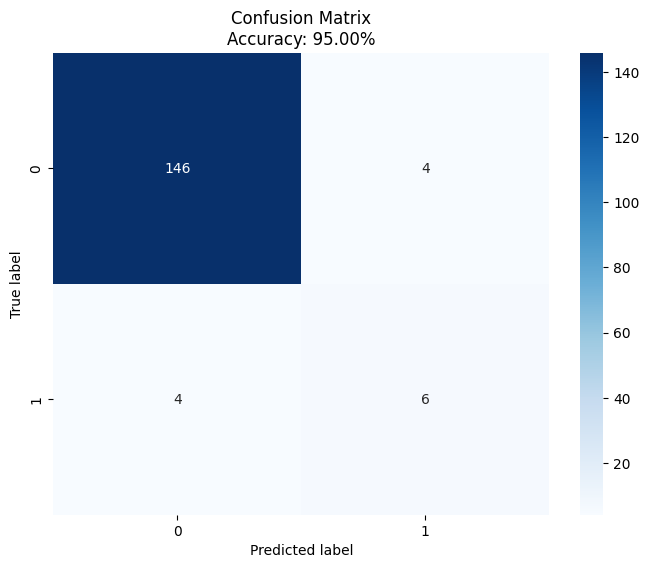

In [9]:
# Separate features and target variable
X = dataFrame.drop('Legendary', axis=1)  # Features
y = dataFrame['Legendary']  # Target variable

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
class_weights_accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\nAccuracy: {:.2f}%'.format(class_weights_accuracy * 100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Oversampling

1. SMOTE (Synthetic Minority Oversampling Technique)

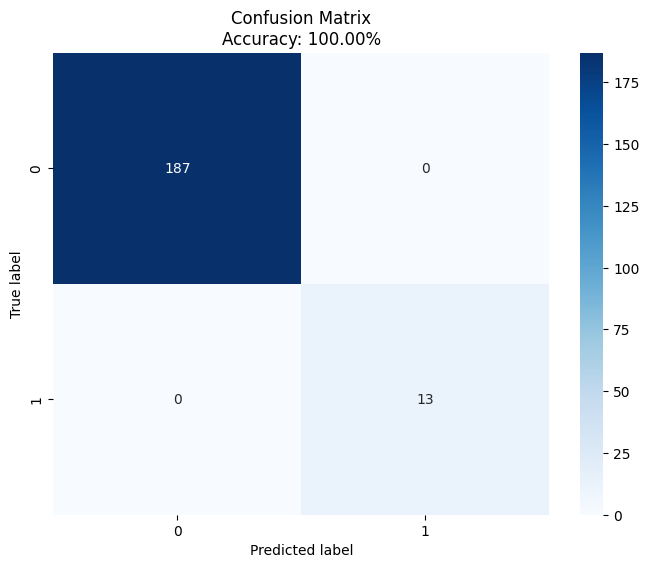

In [10]:
train_df, test_df = train_test_split(dataFrameCopy, random_state=42)
smote = SMOTE()
balanced_df = smote.balance(dataFrameCopy, 'Legendary')

# Separate features and target variable
X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']
X_test = test_df.drop('Legendary', axis=1)
y_test = test_df['Legendary']

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
SMOTE_accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\nAccuracy: {:.2f}%'.format(SMOTE_accuracy * 100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

2. SMOTEENN (Synthetic Minority Oversampling Technique Edited Nearest Neighbor)

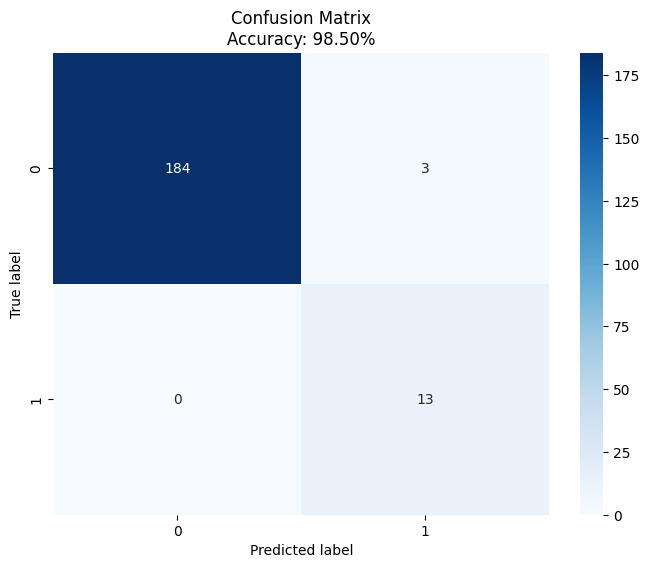

In [11]:
train_df, test_df = train_test_split(dataFrameCopy, random_state=42)
smoteenn = SMOTEENN()
balanced_df = smoteenn.balance(dataFrameCopy, 'Legendary')

# Separate features and target variable
X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']
X_test = test_df.drop('Legendary', axis=1)
y_test = test_df['Legendary']

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
SMOTEENN_accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\nAccuracy: {:.2f}%'.format(SMOTEENN_accuracy * 100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

3. ICOTE (Immune centroids over-sampling method for multiclass classification)

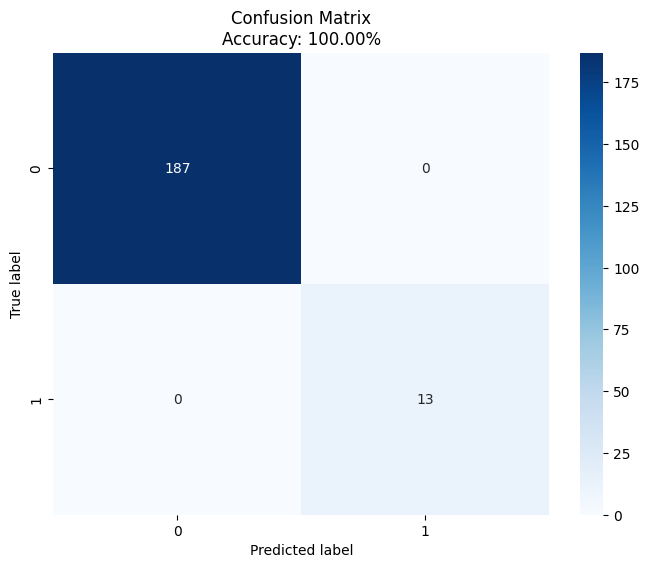

In [12]:
train_df, test_df = train_test_split(dataFrameCopy, random_state=42)
icote = ICOTE()
balanced_df = icote.balance(dataFrameCopy, 'Legendary')

# Separate features and target variable
X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']
X_test = test_df.drop('Legendary', axis=1)
y_test = test_df['Legendary']

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
ICOTE_accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\nAccuracy: {:.2f}%'.format(ICOTE_accuracy * 100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

4. TKRKNN (Top-K Reversed KNN)

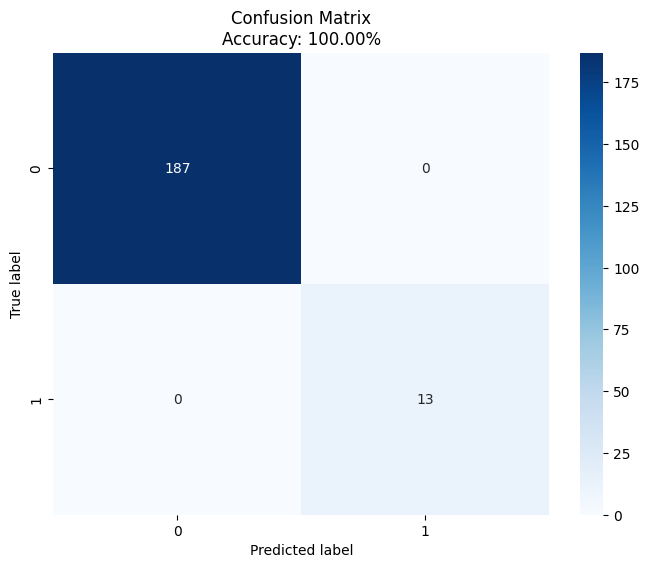

In [13]:
train_df, test_df = train_test_split(dataFrameCopy, random_state=42)
tkrknn = TKRKNN()
balanced_df = tkrknn.balance(dataFrameCopy, 'Legendary')

# Separate features and target variable
X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']
X_test = test_df.drop('Legendary', axis=1)
y_test = test_df['Legendary']

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
TKRKNN_accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\nAccuracy: {:.2f}%'.format(TKRKNN_accuracy * 100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [14]:
# Create a dictionary to store accuracy values
accuracy_data = {
    'Method': ['Undersampling', 'Class weights', 'SMOTE', 'SMOTEENN', 'ICOTE', 'TKRKNN'],
    'Accuracy': [undersampled_accuracy, class_weights_accuracy, SMOTE_accuracy, SMOTEENN_accuracy, ICOTE_accuracy, TKRKNN_accuracy]
}

# Convert the dictionary to a DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Display the DataFrame
display(accuracy_df)

,Method,Accuracy
0,Undersampling,0.961538
1,Class weights,0.950000
2,SMOTE,1.000000
3,SMOTEENN,0.985000
4,ICOTE,1.000000
5,TKRKNN,1.000000
